# Lab 5

Paul Chung

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import simpleaudio as sa
from scipy.io import wavfile as wav

## Summary

Insert summary of the lab

## Assignment 1: Identifying Constituent Frequencies of a Signal

[-1335.9375   -941.40625   941.40625  1335.9375 ]
[ 941.40625 1335.9375 ]


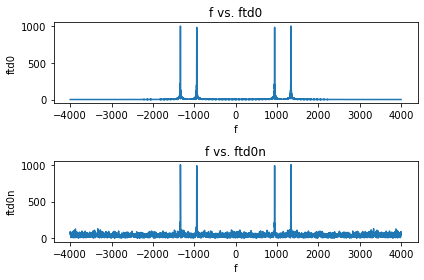

In [7]:
# Assignment 1

# Part A 
fs = 8000
t = np.arange(0, 0.25, 1/fs)
d0 = np.sin(2*np.pi*941*t) + np.sin(2*np.pi*1336*t)

# Part B
pause = np.zeros(int(0.5*fs))
d0_scaled = np.concatenate([d0, pause, d0]) * 50
outfile1 = 'd0.wav'
wav.write(outfile1,fs,d0_scaled.astype('int16'))
play_obj1 = sa.WaveObject.from_wave_file('d0.wav').play()
play_obj1.wait_done()

# Part C
fig = plt.figure(1)
plt.subplot(2, 1, 1)
samples = 4096
ftd0 = np.fft.fft(d0, samples)
ftd0_shift = np.fft.fftshift(np.abs(ftd0))
f_delta = fs/samples
f = np.arange(-fs/2, fs/2, f_delta)
plt.xlabel('f')
plt.ylabel('ftd0')
plt.title('f vs. ftd0')
plt.plot(f, ftd0_shift)

# Part D
threshold = 900
index = np.arange(len(ftd0_shift))
indices = index[ftd0_shift[index] > threshold]
freq = f[indices]
index2 = np.arange(4)
pos_indicies = index2[freq[index2] > 0]
pos_freq = freq[pos_indicies]
print(pos_freq)

# Part E
n = np.random.normal(0, 1, len(d0))
plt.subplot(2, 1, 2)
d0n = n + d0
ftd0n = np.fft.fft(d0n, samples)
ftd0n_shift = np.fft.fftshift(np.abs(ftd0n))
plt.xlabel('f')
plt.ylabel('ftd0n')
plt.title('f vs. ftd0n')
plt.plot(f, ftd0n_shift)

plt.tight_layout()

### Discussion 1

•To identify component frequencies, we used a threshold value of 900.  Using your DFT magnitude plot,explain why a threshold of 100 would not work.2
•Would that threshold identify more or fewer frequencies than the threshold of 900?
•Comment on how the addition of noise changes the DFT plot.
•What would the DFT look like if instead the signal had been v(t) = 1 + sin(2π(941)t) + sin(2π(1336)t)?

If we used a theshold value of 100 instead of 900, we might identify other component frequencies that are do not actually exist. This can occur especially with noise as frequency components that should have a value of 0 might exceed a low threshold value of 100 with added noise. A lower threshold like 100 would allow more frequencies than a higher threshold of 900. If we add the + 1 constant to our signal v(t) then we should get an additional frequency component at f = 0. 


## Assignment 2: Classifying Touch-Tone Telephone Signals

In [84]:
# Part A
tone_freqs = np.array([[941, 1336],
                      [697, 1209], 
                      [697, 1336],
                      [697, 1477],
                      [770, 1209],
                      [770, 1336],
                      [770, 1477],
                      [852, 1209],
                      [852, 1336],
                      [852, 1477]])

def classify(x, fs):
    tone_freqs = np.array([[941, 1336],[697, 1209], [697, 1336],[697, 1477],[770, 1209], [770, 1336],
                          [770, 1477],[852, 1209],[852, 1336],[852, 1477]])
    
    samples = 4096
    xfft = np.fft.fft(x, samples)
    xfft_abs = np.fft.fftshift(np.abs(xfft))
    # after shift, frequencies are now centered around 0, -fs/2 to fs/2
    delta_f = fs/samples
    f = np.arange(-fs/2, fs/2, delta_f)
    
    threshold = 900
    # filtering indices above threshold
    ind = np.arange(len(xfft_abs))
    index_tone = ind[xfft_abs[ind]>threshold]
    freq_tone = f[index_tone]
    # filtering indices that correspond to the positive frequencies
    ind1 = np.arange(len(freq_tone))
    pos_index_tone = ind1[freq_tone[ind1]>0]
    pos_freq = freq_tone[pos_index_tone]
    
    # classifying which digit is closest to signal (least error)
    min_e = 1
    min_e_tone = 0
    for digit in range(0, len(tone_freqs)):
        # getting error between low frequency and high frequency of signal and current digit
        digit_error = (tone_freqs[digit][0]-pos_freq[0])**2 + (tone_freqs[digit][1]-pos_freq[1])**2
        if(digit_error < min_e):
            mine_e = digit_error
            min_e_tone = digit

    return min_e_tone

In [89]:
fs = 8000
d0 = np.sin(2*np.pi*941*t) + np.sin(2*np.pi*1336*t)
digit = classify(d0,fs)
print(digit)

d9 = np.sin(2*np.pi*852*t) + np.sin(2*np.pi*1477*t)
digit = classify(d9, fs)
print(digit)

0
9


## Assignment 3: Decoding a Phone Number from Touch-Tone Signals

In [88]:
fs = 8000
file = open('phonenum.csv', 'rb')
rm = np.loadtxt(file, delimiter=',')

phone_num = np.ones(11) * -1

for i in range(0, 11):
    d_curr = rm[(i * 4000):((i + 1) * 4000)]
    phone_num[i] = classify(d_curr, fs)

print(phone_num)
    

[1. 8. 0. 0. 7. 8. 6. 1. 0. 0. 0.]


The number above is to In-N-Out. 